In [2]:
import os
import pathlib
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import (
    Sequential, 
    Model
)
from tensorflow.keras import layers
from tensorflow.keras.layers import (
    Dense, 
    GlobalAveragePooling2D,
    Conv2D, 
    BatchNormalization, 
    Activation, 
    Add, 
    MaxPooling2D, 
    AveragePooling2D, 
    Flatten,
    Rescaling,
    RandomFlip,
    RandomRotation,
    RandomZoom,
    Dropout,
)
from tensorflow.keras import callbacks
from tensorflow.keras.models import Model
from tensorflow.keras import Input
import tensorflow_datasets as tfds

c:\Users\tama0\anaconda3\envs\tf39\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
# 경로 설정
base_dir = 'chest_xray'
new_base_dir = pathlib.Path(base_dir)

# 이미지 크기 및 배치 크기 설정
image_size = (224, 224)
batch_size = 64

# 이미지 가져옴
train_dataset = image_dataset_from_directory(
    new_base_dir / 'train',
    image_size=image_size,
    batch_size=batch_size
)

validation_dataset = image_dataset_from_directory(
    new_base_dir / 'val',
    image_size=image_size,
    batch_size=batch_size
)

test_dataset = image_dataset_from_directory(
    new_base_dir / 'test',
    image_size=image_size,
    batch_size=batch_size
)

Found 5216 files belonging to 2 classes.
Found 16 files belonging to 2 classes.
Found 624 files belonging to 2 classes.


In [4]:
# 데이터 증강
data_augmentation = Sequential(
    [
        Rescaling(1./255),
        RandomFlip('horizontal'),
        RandomRotation(0.1),
        RandomZoom(0.2),
    ]
)

In [11]:
# resnet을 시도했으나 아래의 모델 보다 복잡하고 성능이 별로라서 변경
inputs = Input(shape=(224, 224, 3))
x = data_augmentation(inputs)
x = Conv2D(filters=32, kernel_size=3, activation='relu')(x)
x = MaxPooling2D(pool_size=2)(x)
x = Conv2D(filters=64, kernel_size=3, activation='relu')(x)
x = MaxPooling2D(pool_size=2)(x)
x = Conv2D(filters=128, kernel_size=3, activation='relu')(x)
x = MaxPooling2D(pool_size=2)(x)
x = Conv2D(filters=256, kernel_size=3, activation='relu')(x)
x = MaxPooling2D(pool_size=2)(x)
x = Conv2D(filters=256, kernel_size=3, activation='relu')(x)
x = MaxPooling2D(pool_size=2)(x)
x = Conv2D(filters=512, kernel_size=3, activation='relu')(x)
x = Flatten()(x)
x = Dropout(0.5)(x)
outputs = Dense(1, activation='sigmoid')(x)

model = Model(inputs=inputs, outputs=outputs)

model.compile(
    loss='binary_crossentropy',
    optimizer='rmsprop',
    metrics=['accuracy']
)

model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 sequential (Sequential)     (None, 224, 224, 3)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 111, 111, 32)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                       

In [6]:
# 텐서보드 콜백 정의
tensorboard = callbacks.TensorBoard(
    log_dir='./logs'
)

# checkpoint
check_point_callback = callbacks.ModelCheckpoint(
    filepath="my_ckp",
    save_best_only=True,
    monitor="val_loss"
)


In [12]:
history = model.fit(
    train_dataset,
    epochs=10,
    validation_data=validation_dataset,
    callbacks=[tensorboard, check_point_callback]
)

Epoch 1/10
82/82 [==============================] - 11s 115ms/step - loss: 0.7660 - accuracy: 0.7310 - val_loss: 0.9318 - val_accuracy: 0.5000
Epoch 2/10
82/82 [==============================] - 9s 111ms/step - loss: 0.5759 - accuracy: 0.7383 - val_loss: 1.7778 - val_accuracy: 0.6250
Epoch 3/10
82/82 [==============================] - ETA: 0s - loss: 0.4531 - accuracy: 0.7995

INFO:tensorflow:Assets written to: my_ckp\assets


INFO:tensorflow:Assets written to: my_ckp\assets


82/82 [==============================] - 11s 125ms/step - loss: 0.4531 - accuracy: 0.7995 - val_loss: 0.6407 - val_accuracy: 0.5625
Epoch 4/10
82/82 [==============================] - 9s 111ms/step - loss: 0.3512 - accuracy: 0.8677 - val_loss: 1.2582 - val_accuracy: 0.6250
Epoch 5/10
82/82 [==============================] - 9s 111ms/step - loss: 0.2765 - accuracy: 0.8915 - val_loss: 0.9892 - val_accuracy: 0.6875
Epoch 6/10
81/82 [============================>.] - ETA: 0s - loss: 0.2473 - accuracy: 0.9105

INFO:tensorflow:Assets written to: my_ckp\assets


INFO:tensorflow:Assets written to: my_ckp\assets


82/82 [==============================] - 10s 123ms/step - loss: 0.2497 - accuracy: 0.9101 - val_loss: 0.5687 - val_accuracy: 0.6250
Epoch 7/10
82/82 [==============================] - 10s 112ms/step - loss: 0.2332 - accuracy: 0.9130 - val_loss: 0.9247 - val_accuracy: 0.6250
Epoch 8/10
82/82 [==============================] - 10s 112ms/step - loss: 0.1967 - accuracy: 0.9254 - val_loss: 1.1671 - val_accuracy: 0.6250
Epoch 9/10
82/82 [==============================] - 10s 119ms/step - loss: 0.2023 - accuracy: 0.9327 - val_loss: 0.9379 - val_accuracy: 0.6250
Epoch 10/10
82/82 [==============================] - 10s 114ms/step - loss: 0.1753 - accuracy: 0.9340 - val_loss: 0.6589 - val_accuracy: 0.6875


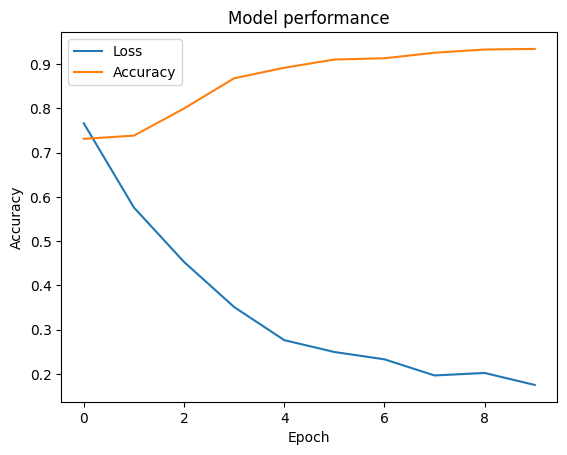

In [13]:
# Visualize the loss and accuracy
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.title('Model performance')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Loss', 'Accuracy'], loc='upper left')
plt.show()

In [9]:
# 모델 평가
test_loss, test_accuracy = model.evaluate(test_dataset)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

10/10 [==============================] - 1s 72ms/step - loss: 0.5109 - accuracy: 0.8029
Test Loss: 0.5108564496040344
Test Accuracy: 0.8028846383094788


In [22]:
import tensorflow as tf
import tensorflow.keras as keras

img_path = keras.utils.get_file(
    fname='person1_virus_6.jpeg',
    origin='file://C:\\Users\\tama0\\git\\notebook\\chest_xray\\test\\PNEUMONIA\\person1_virus_6.jpeg'
)

def get_img_array(img_path, target_size):
    img = keras.utils.load_img(img_path, target_size=target_size)
    array = keras.utils.img_to_array(img)
    array = np.expand_dims(array, axis=0)
    return array

img_array = get_img_array(img_path, (224, 224))

last_conv_layer_name = 'conv2d_11'
last_conv_layer = model.get_layer(last_conv_layer_name)
last_layer_model = Model(model.inputs, last_conv_layer.output)

new_inputs = Input(shape=last_conv_layer.output.shape[1:])
x = new_inputs
for i in range(1, 4):
    x = model.layers[-i](x)

classifier = Model(new_inputs, x)

with tf.GradientTape() as tape:
    last_layer_model_output = last_layer_model(img_array)
    tape.watch(last_layer_model_output)
    

# Define the model
layer_index = -4  # x = Conv2D(filters=512, kernel_size=3, activation='relu')

# 특정 레이어까지의 모델을 추출합니다.
partial_model = Model(inputs=model.inputs, outputs=model.layers[layer_index].output)

test_image = test_dataset.take(1)

# Get the last convolutional layer
last_conv_layer = model.layers[layer_index]

# Create a function to generate class activation maps
def grad_cam(model, image, target_class):
    with tf.GradientTape() as tape:
        tape.watch(image)
        outputs = model(image)
        loss = tf.keras.losses.categorical_crossentropy(y_true=[target_class], y_pred=outputs)

    grads = tape.gradient(loss, image)
    cam = tf.reduce_sum(grads * last_conv_layer.output, axis=-1)
    cam = tf.keras.backend.cast(cam, tf.float32)
    cam = cv2.resize(cam, (224, 224))
    return cam

# Generate a class activation map for the cat class
cam = grad_cam(partial_model, test_image, target_class=0)

# Display the class activation map
plt.imshow(cam)
plt.show()

Exception: URL fetch failure on file://Users\tama0\git\notebook\chest_xray\test\PNEUMONIA\person1_virus_6.jpeg: None -- [WinError 3] 지정된 경로를 찾을 수 없습니다: ''

In [ ]:
# 원본 이미지와 Class activation map을 시각화합니다.
# plt.imshow(test_image)
# plt.imshow(cam, cmap='jet', alpha=0.5)
# plt.show()

class_names = ['Normal', 'Pneumonia']

plt.figure.Figure(figsize=(10, 10))
for images, labels in train_data.take(1):
  for i in range(9):
    ax = plt.pyplot.subplot(3, 3, i + 1)
    plt.pyplot.imshow(images[i].numpy().astype("uint8"))
    plt.pyplot.title(class_names[int(labels[i])])
    plt.pyplot.axis("off")

In [ ]:
model.layers[-4]


NameError: name 'model' is not defined

In [ ]:
# 업로드
# 로컬에서 실행했음
!tensorboard dev upload --logdir logs

^C


In [17]:
model.layers[-6].name

'conv2d_10'